# Задание на аппроксимацию


$Необходимо\; восстановить\; коэффициенты\; функции\; f(x),\; зная\; её\; значения\; на\; некотором\; наборе\; точек.$

$При\; этом\; известно,\; что$

$$f(x) = [(a + \varepsilon_a) \cdot sin(x) + (b + \varepsilon_b) \cdot ln(x)]^2 + (c + \varepsilon_c) \cdot x^2$$

$где\; \varepsilon_a,\; \varepsilon_b,\; \varepsilon_c\;  —\; случайные\; величины,\; которые\; принимают\; значения\; из\; отрезка\; [–0.001, 0.001]; a,\; b,\; c\; —\; неизвестные\; положительные\; константы,\; которые\; требуется\; найти\; (абсолютная\; ошибка\; не\; должна\; превышать\; 10^{-2}).$

In [0]:
import numpy as np
import pandas as pd
import sympy as sp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (12, 8)

In [837]:
data = pd.read_csv('data.csv')
data.columns

Index(['9.48153782478', '394.853786783'], dtype='object')

In [0]:
x = data['9.48153782478']
y = data['394.853786783']

In [0]:
sin_in_2 = np.sin(x)**2
sin_ln = np.log(x) * np.sin(x) * 2
ln_in_2 = np.log(x)**2
x_in_2 = x**2

In [840]:
X = pd.DataFrame({'sin(x)^2': sin_in_2, '2*sin(x)*ln(x)': sin_ln,
                   'log(x)^2': ln_in_2, 'x^2': x_in_2})
X

,sin(x)^2,2*sin(x)*ln(x),log(x)^2,x^2
0,0.314505,2.162932,3.718755,47.314402
1,0.000138,-0.052731,5.038174,89.047994
2,0.174616,-1.064167,1.621343,12.764139
3,0.777513,0.135063,0.005866,1.165527
4,0.003937,-0.282345,5.062418,90.013851
...,...,...,...,...
994,0.425565,2.824613,4.686972,75.935416
995,0.358136,-1.592530,1.770383,14.312232
996,0.099081,1.390515,4.878690,82.893068
997,0.978644,1.070079,0.292514,2.949665


In [841]:
Xtrans_X = np.dot(X.transpose(), X)
Xtrans_X

array([[3.46088540e+02, 2.29941917e+02, 1.08105602e+03, 1.35819313e+04],
       [2.29941917e+02, 4.32422408e+03, 1.55091711e+03, 2.93220062e+04],
       [1.08105602e+03, 1.55091711e+03, 1.00358494e+04, 1.19322078e+05],
       [1.35819313e+04, 2.93220062e+04, 1.19322078e+05, 1.75825917e+06]])

In [842]:
lam = 0
X_inv = np.linalg.inv(Xtrans_X + lam * np.eye(len(Xtrans_X)))
X_inv

array([[ 4.39258978e-03, -4.64769190e-05, -3.71630726e-04,
        -7.93586389e-06],
       [-4.64769190e-05,  2.68171807e-04,  6.45590629e-05,
        -8.49443069e-06],
       [-3.71630726e-04,  6.45590629e-05,  5.61114289e-04,
        -3.62852431e-05],
       [-7.93586389e-06, -8.49443069e-06, -3.62852431e-05,
         3.23415844e-06]])

In [843]:
w = np.dot(np.dot(X_inv, X.transpose()), y)
w

array([9.86990558, 8.53994127, 7.3897565 , 3.99995487])

In [0]:
# (b - a) * random_sample() + a
eps_a = 0.002 * np.random.random_sample() + 0.001
eps_b = 0.002 * np.random.random_sample() + 0.001
eps_c = 0.002 * np.random.random_sample() + 0.001

In [845]:
qa = sp.symbols('qa')
sp.solve((qa + eps_a)**2 - w[0], qa)

[-3.14407197489476, 3.13920920105223]

In [846]:
qb = sp.symbols('qb')
sp.solve((qb + eps_b)**2 - w[2], qb)

[-2.71945515752726, 2.71736615460384]

In [847]:
qc = sp.symbols('qc')
sp.solve((qc + eps_c) - w[3], qc)

[3.99766454139163]

In [0]:
w_a = [3.13925230425691, 2.71634764430228, 3.99695883624438]

In [849]:
# a = w_a[0]
# b = w_a[1]
# c = w_a[2]

# a = 3.14
# b = 2.72
# c = 4 

a = np.pi
b = np.e
c = 4

# a = np.sqrt(w[0])
# b = np.sqrt(w[2])
# c = w[3]

a, a * b, b, c

(3.141592653589793, 8.539734222673566, 2.718281828459045, 4)

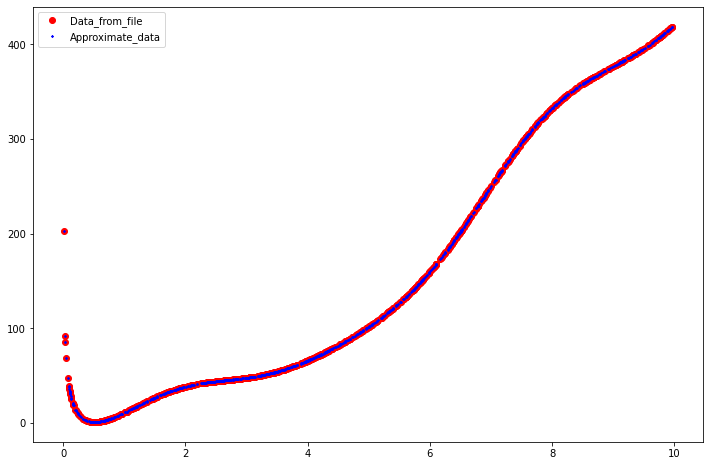

In [850]:
x_new = np.linspace(0, 10, len(x))
# f = ((a - eps_a) * np.sin(x) + (b - eps_b) * np.log(x))**2 + (c - eps_c) * x**2
f = (a * np.sin(x) + b * np.log(x))**2 + c * x**2
plt.plot(x, y, color='red', marker ='o', markersize=6, linestyle ='', label='Data_from_file')
plt.plot(x, f, color='blue', marker='*', markersize=2, linestyle='', label='Approximate_data')
plt.legend()

In [0]:
z = np.zeros_like(y)
W = np.eye(len(y))
for i in range(len(y)):
  z[i] = (f[i] - y[i])**2
  W[i][i] = 1 / z[i]




No handles with labels found to put in legend.


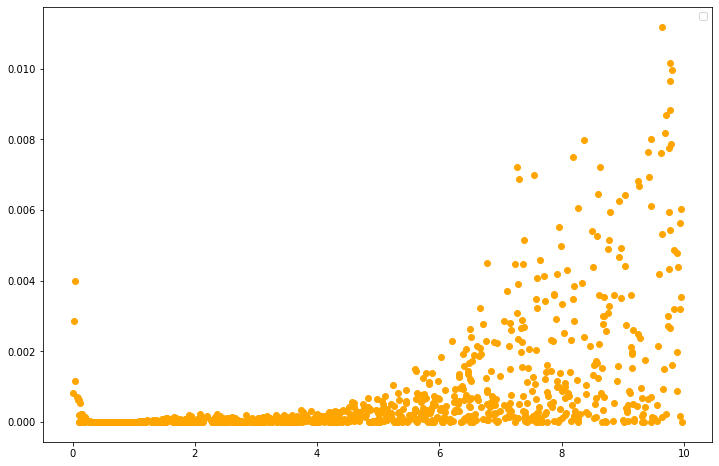

In [852]:
plt.plot(x, z, color='orange', marker ='o', markersize=6, linestyle ='', label='')
plt.legend()

In [0]:
X_new = pd.DataFrame({'sin(x)^2': sin_in_2, '2*sin(x)*ln(x)': sin_ln,
                   'log(x)^2': ln_in_2, 'x^2': x_in_2})

In [854]:
lam_new = 1
Xt_W = np.dot(X_new.transpose(), W**2)
Xt_W_X = np.dot(Xt_W, X_new)
Xt_W_X_inv = np.linalg.inv(Xt_W_X + lam_new * np.eye(len(Xt_W_X)))
Xt_W_X_inv_Xt = np.dot(Xt_W_X_inv, X_new.transpose())
Xt_W_X_inv_Xt_W = np.dot(Xt_W_X_inv_Xt, W**2)
omega = np.dot(Xt_W_x_inv_Xt_W, y)
omega

array([9.74958928, 8.48826328, 7.39063442, 4.00086356])

In [855]:
a_new = np.sqrt(omega[0])
b_new = np.sqrt(omega[2])
c_new = omega[3]
a_new, a_new * b_new, b_new, c_new

(3.122433230113751, 8.4885599516024, 2.718572128215904, 4.000863557195273)

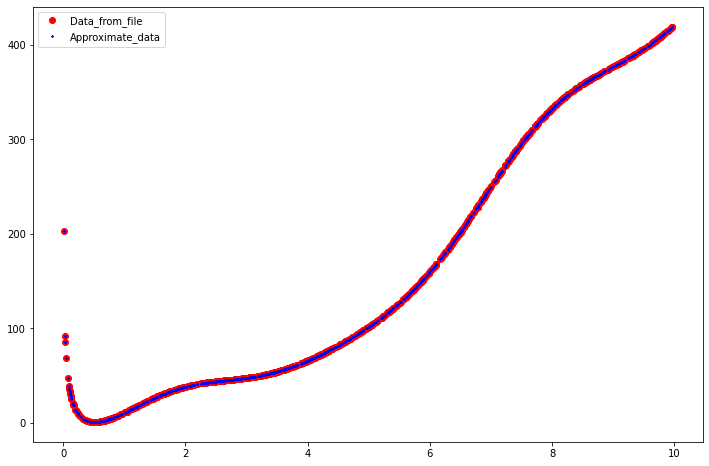

In [856]:
x_new = np.linspace(0, 10, len(x))
f_new = (a_new * np.sin(x) + b_new * np.log(x))**2 + c_new * x**2
plt.plot(x, y, color='red', marker ='o', markersize=6, linestyle ='', label='Data_from_file')
plt.plot(x, f_new, color='blue', marker='*', markersize=2, linestyle='', label='Approximate_data')
plt.legend()

No handles with labels found to put in legend.


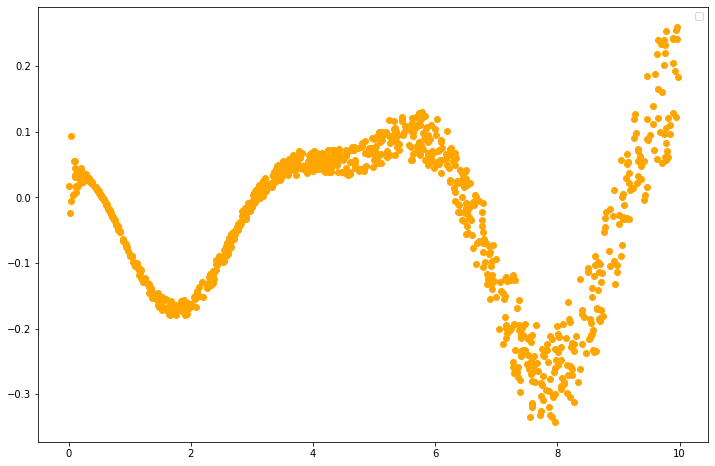

In [857]:
z_new = np.zeros_like(y)
for i in range(len(y)):
  z_new[i] = f_new[i] - y[i]
plt.plot(x, z_new, color='orange', marker ='o', markersize=6, linestyle ='', label='')
plt.legend()